In [1]:
import dpkt
import os
import pandas as pd
from utils.util import create_directory_if_not_exists, find_files_with_extension
from utils.plotter import plot_siftr_graph


# Convert bytes to Mbit/s
def bytes_to_mbits(bytes):
    return (bytes * 8) / 1_000_000

# Read pcap file and get throughput per second for specific ports
def read_pcap(file_path):
    throughput_per_second = {5101: {}, 5102: {}, 5103: {}}
    total_throughput = {5101: 0, 5102: 0, 5103: 0}
    start_time = None

    with open(file_path, 'rb') as f:
        pcap = dpkt.pcap.Reader(f)

        for timestamp, buf in pcap:
            eth = dpkt.ethernet.Ethernet(buf)
            if not isinstance(eth.data, dpkt.ip.IP):
                continue

            ip = eth.data
            if not isinstance(ip.data, dpkt.tcp.TCP):
                continue

            tcp = ip.data
            dest_port = tcp.dport
            if dest_port not in throughput_per_second:
                continue

            pkt_length = len(buf)

            if start_time is None:
                start_time = timestamp

            # Normalize the timestamp to start from 0
            normalized_time = int(timestamp - start_time)

            if normalized_time not in throughput_per_second[dest_port]:
                throughput_per_second[dest_port][normalized_time] = pkt_length
            else:
                throughput_per_second[dest_port][normalized_time] += pkt_length
            total_throughput[dest_port] += pkt_length

    return throughput_per_second , total_throughput

# Plot throughput using plot_siftr_graph
def plot_throughput_with_siftr(file_path, ycolumn, title, xlabel, ylabel, filename, graph_directory):
    throughput, total_thrpt = read_pcap(file_path)
    paths = {}
    print(f"Total throughput for {filename}: {total_thrpt}")

    for port, data in throughput.items():
        # Sort throughput dictionary by time
        sorted_throughput = sorted(data.items())

        # Prepare time and throughput values
        times = [item[0] for item in sorted_throughput]
        mbits_transferred = [bytes_to_mbits(item[1]) for item in sorted_throughput]
        

        # Create a DataFrame for each port
        path_df = pd.DataFrame({'Time': times, ycolumn: mbits_transferred})
        path_label = f"Port {port}"
        if port == 5101:
            path_label = "Cubic"
        elif port == 5102: 
            path_label = "New Reno"
        elif port == 5103:
            path_label = "DCTCP"
        # Store the DataFrame in the paths dictionary
        paths[path_label] = path_df

    # Ensure the output directory exists
    create_directory_if_not_exists(graph_directory)

    # Call the plot_siftr_graph function to plot the graph
    plot_siftr_graph(paths, ycolumn, title, xlabel, ylabel, filename, graph_directory)

# Main execution
mainpth = "./Data"
graph_directory = os.path.join(mainpth, "Graphs")
create_directory_if_not_exists(graph_directory)

folderpath = os.path.join(mainpth, "server_data")

# Use the new find_files_with_extension function
filenames, filepaths, file_dict = find_files_with_extension(paths=[folderpath], extension='.em1.pcap')

from utils.thrpt_util import analysis_pcap_tcp

Directory already exists: ./Data\Graphs


In [2]:
# # Plot throughput for each pcap file
# for filename, filepath in zip(filenames, filepaths):
#     print(filename)
#     analysis_pcap_tcp(filepath)

Total throughput for 1_1_fq_codel_10Mbps_1ms_dsthost.em1.pcap_throughput: {5101: 53809049, 5102: 56067327, 5103: 59448524}
Directory already exists: ./Data\Graphs


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


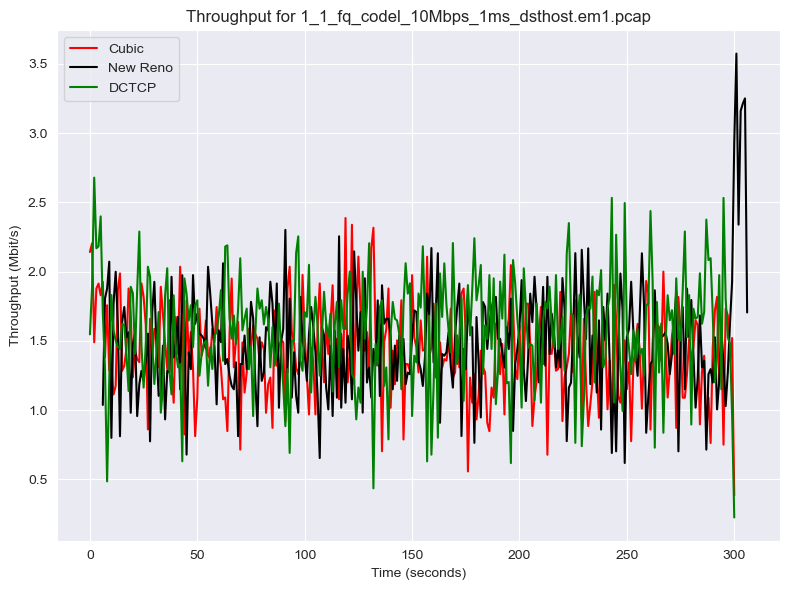

Total throughput for 1_1_fq_pie_10Mbps_1ms_dsthost.em1.pcap_throughput: {5101: 27159738, 5102: 24675799, 5103: 26738040}
Directory already exists: ./Data\Graphs


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


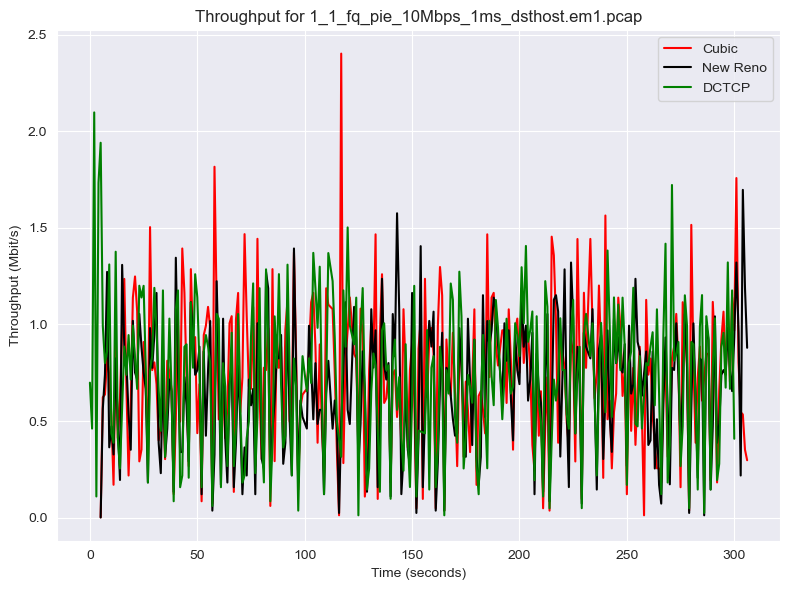

Total throughput for 1_1_l4s_10Mbps_1ms_dsthost.em1.pcap_throughput: {5101: 27368482, 5102: 27873094, 5103: 43186856}
Directory already exists: ./Data\Graphs


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


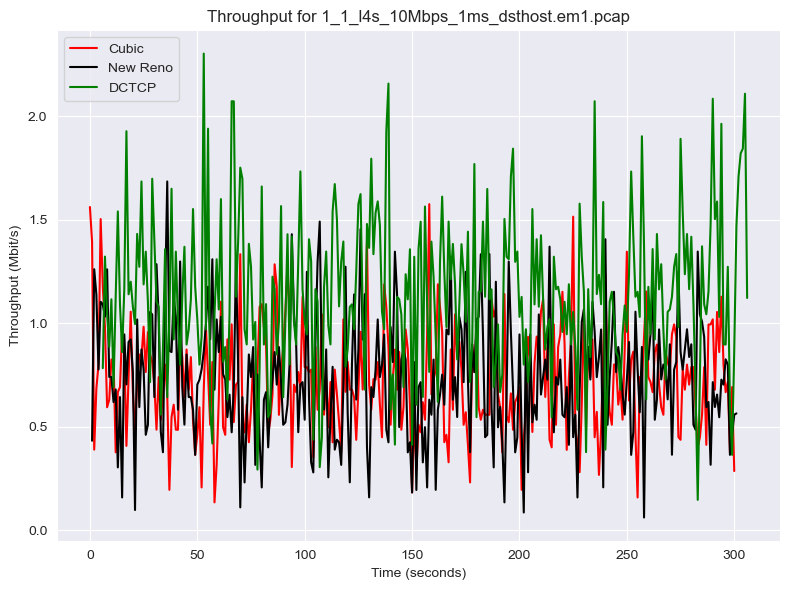

Total throughput for 2_2_fq_codel_10Mbps_1ms_dsthost.em1.pcap_throughput: {5101: 74303556, 5102: 1032979, 5103: 79013700}
Directory already exists: ./Data\Graphs


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


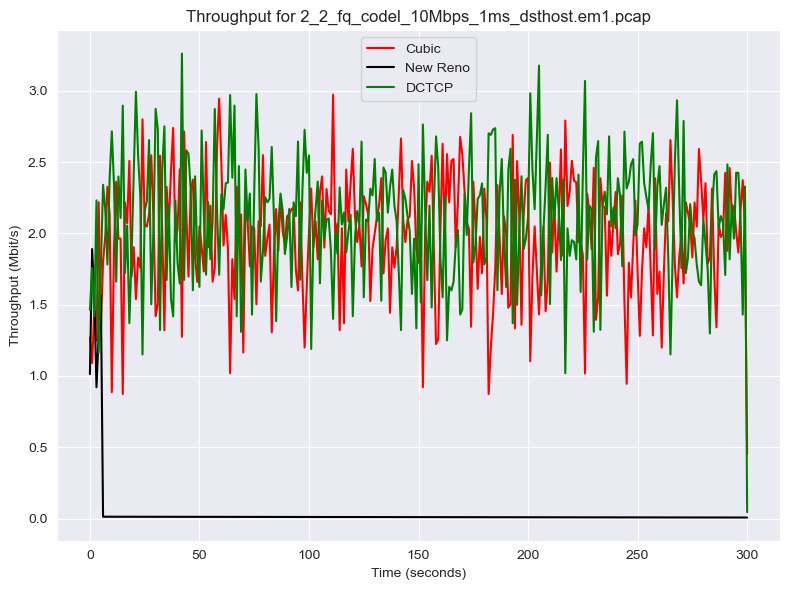

Total throughput for 2_2_fq_pie_10Mbps_1ms_dsthost.em1.pcap_throughput: {5101: 28698838, 5102: 27600179, 5103: 29575646}
Directory already exists: ./Data\Graphs


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


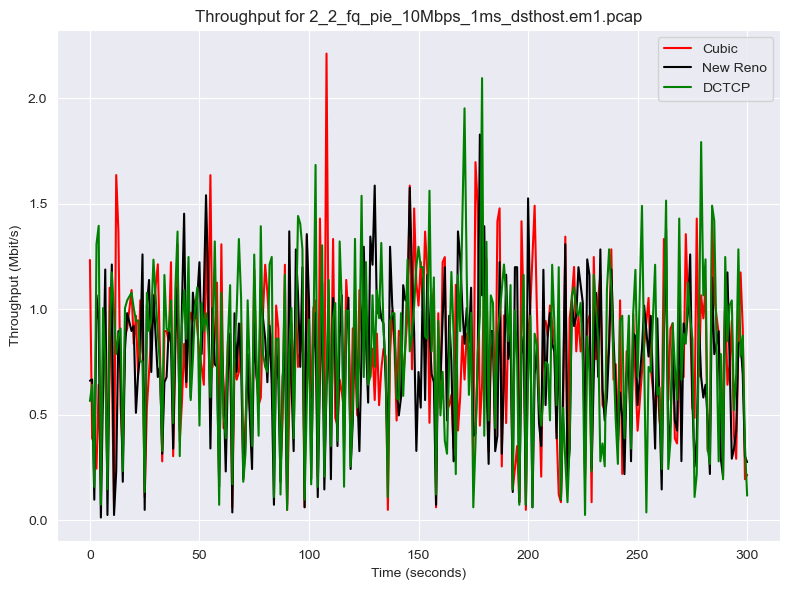

Total throughput for 2_2_l4s_10Mbps_1ms_dsthost.em1.pcap_throughput: {5101: 27065621, 5102: 28895351, 5103: 43332816}
Directory already exists: ./Data\Graphs


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


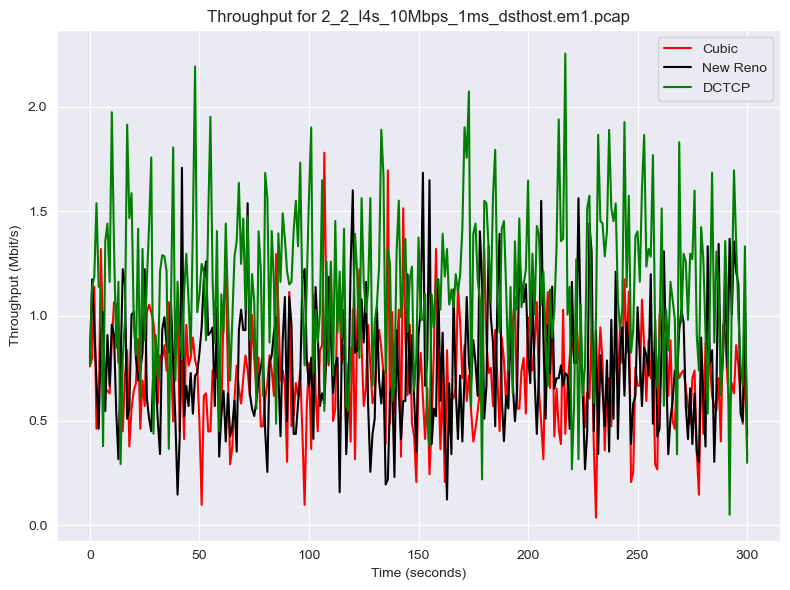

In [3]:
# Plot throughput for each pcap file
for filename, filepath in zip(filenames, filepaths):
    plot_throughput_with_siftr(
        file_path=filepath,
        ycolumn="Throughput (Mbit/s)",
        title=f"Throughput for {filename}",
        xlabel="Time (seconds)",
        ylabel="Throughput (Mbit/s)",
        filename=f"{filename}_throughput",
        graph_directory=graph_directory
    )